In [9]:
using DifferentialEquations
using Plots

In [11]:
k = 0.5  # Effort scaling constant
r = 0.1  # Growth rate
K = 2000.0  # Carrying capacity
S = 0.5  # Average social position (0 to 1)

0.5

In [ ]:
function H(t)
    if t < 12  # Generations 0 and 1: uniform over 3 strata
        return log(3)  # approx 1.0986
    elseif t < 24  # Generation 2: uniform over 2 strata
        return log(2)  # approx 0.6931
    else  # Generation 3: full visibility
        return 0.0
    end
end

H (generic function with 1 method)

In [13]:
# Differential equations system
function model!(du, u, p, t)
    P, E = u
    # Effort equation: dE/dt = k * H(t) * (1 - S)
    du[2] = k * H(t) * (1 - S)
    # Population equation: dP/dt = r * E * P * (1 - P/K)
    du[1] = r * E * P * (1 - P / K)
end

model! (generic function with 1 method)

In [14]:
# Time span: 0 to 36 months
tspan = (0.0, 36.0)

# Initial conditions: P(0) = 8, E(0) = 1
u0 = [8.0, 1.0]

# Solve ODE
prob = ODEProblem(model!, u0, tspan)
sol = solve(prob, Tsit5())  # Use Tsit5 solver for efficiency

# Extract time, P, and E
t = sol.t
P = [u[1] for u in sol.u]
E = [u[2] for u in sol.u]

16-element Vector{Float64}:
 1.0
 1.0376567481936403
 1.295221356974632
 1.785950250426614
 2.643543622342087
 3.2511141158519123
 3.9798691414979857
 4.560439915558079
 4.942628539340201
 5.395129411152412
 6.123655119487682
 6.387539661142899
 6.387539661142899
 6.387539661142899
 6.387539661142899
 6.387539661142899

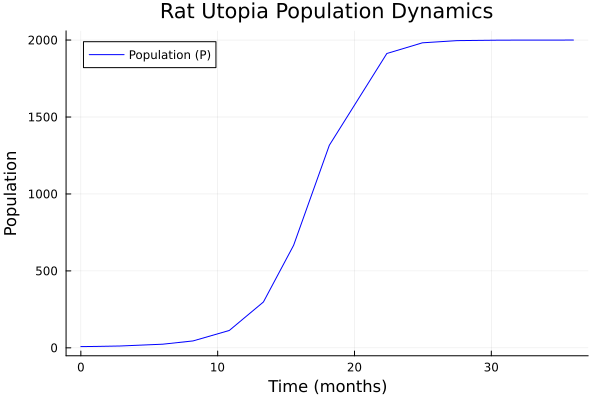

In [ ]:
# Plot population
p = plot(t, P, label="Population (P)", color=:blue, xlabel="Time (months)", ylabel="Population", title="Rat Utopia Population Dynamics", grid=true)
# savefig("rat_utopia_population.png")  # Optional: save the plot
display(p)

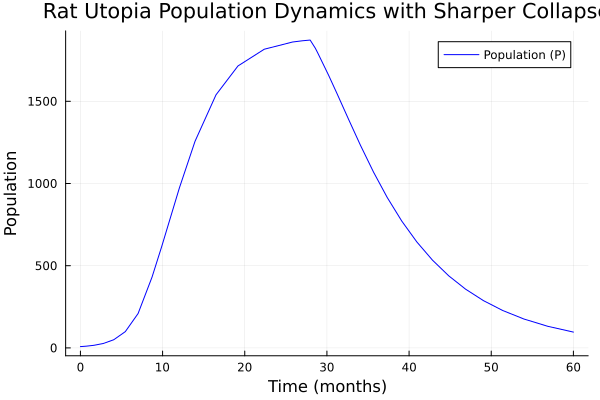

In [ ]:

k = 1.0  # Effort scaling constant
r = 0.4  # Growth rate
K = 2200.0  # Carrying capacity
S = 0.5  # Average social position (0 to 1)
decay_e = 0.4  # Decay rate for effort
m = 0.02  # Base mortality rate
alpha = 0.08  # Extra mortality scaling for low H

#entropy function based on time (in months)
function H(t)
    if t < 8  # Generations 0 and 1: uniform over 3 strata
        return log(3)  # approx 1.0986
    elseif t < 28  # Generation 2: uniform over 2 strata
        return log(2)  # approx 0.6931
    else  # Generation 3: full visibility
        return 0.0
    end
end

#differential equations system
function model!(du, u, p, t)
    P, E = u
    # Effort equation: dE/dt = k * H(t) * (1 - S) - decay_e * E
    du[2] = k * H(t) * (1 - S) - decay_e * E
    # Extra mortality: alpha * (1 - H(t)/log(3))
    extra_m = alpha * (1 - H(t) / log(3))
    current_m = m + extra_m
    # Population equation: dP/dt = r * E * P * (1 - P/K) - current_m * P
    du[1] = r * E * P * (1 - P / K) - current_m * P
end

# Time span: 0 to 60 months
tspan = (0.0, 60.0)

# Initial conditions: P(0) = 8, E(0) = 1
u0 = [8.0, 1.0]

# Solve ODE
prob = ODEProblem(model!, u0, tspan)
sol = solve(prob, Tsit5())

# Extract time, P, and E
t = sol.t
P = [u[1] for u in sol.u]
E = [u[2] for u in sol.u]

#plot population
p=plot(t, P, label="Population (P)", color=:blue, xlabel="Time (months)", ylabel="Population", title="Rat Utopia Population Dynamics with Sharper Collapse", grid=true)
# savefig("rat_utopia_population_collapse_updated.png")  
display(p)

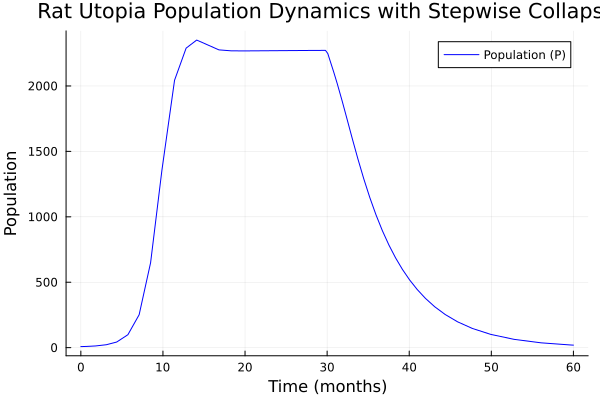

In [ ]:
k = 1.0  # Effort scaling constant
r = 0.2  # Growth rate
K = 2400.0  # Carrying capacity
S = 0.5  # Average social position (0 to 1)
decay_e_base = 0.05  # Base decay rate for effort
decay_e_collapse = 1.0  # Collapse decay rate for effort
m = 0.015  # Base mortality rate
alpha = 0.15  # Extra mortality scaling for low H

# Entropy function based on time (in months)
function H(t)
    if t < 15  # Generations 0 and 1: uniform over 3 strata
        return log(3)  # approx 1.0986
    elseif t < 30  # Generation 2: uniform over 2 strata
        return log(2)  # approx 0.6931
    else  # Generation 3: full visibility
        return 0.0
    end
end

#differential equations system
function model!(du, u, p, t)
    P, E = u
    h = H(t)
    # Decay rate: stepwise for sharp collapse
    decay_e = (h == 0) ? decay_e_collapse : decay_e_base
    # Effort equation: dE/dt = k * h * (1 - S) - decay_e * E
    du[2] = k * h * (1 - S) - decay_e * E
    # Extra mortality: alpha * (1 - h/log(3))
    extra_m = alpha * (1 - h / log(3))
    current_m = m + extra_m
    # Population equation: dP/dt = r * E * P * (1 - P/K) - current_m * P
    du[1] = r * E * P * (1 - P / K) - current_m * P
end

# Time span: 0 to 60 months
tspan = (0.0, 60.0)

# Initial conditions: P(0) = 8, E(0) = 1
u0 = [8.0, 1.0]

# Solve ODE
prob = ODEProblem(model!, u0, tspan)
sol = solve(prob, Tsit5())  #Tsit5 solver for efficiency

# Extract time, P, and E
t = sol.t
P = [u[1] for u in sol.u]
E = [u[2] for u in sol.u]

# Plot population
p=plot(t, P, label="Population (P)", color=:blue, xlabel="Time (months)", ylabel="Population", title="Rat Utopia Population Dynamics with Stepwise Collapse", grid=true)
# savefig("rat_utopia_population_collapse_DE.png")
display(p)

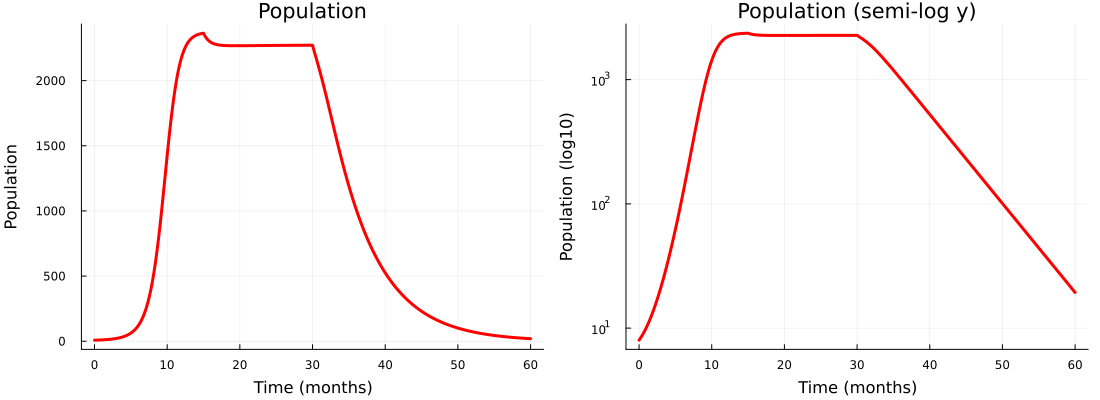

In [7]:
using DifferentialEquations
using Plots
using Measures

k = 1.0
r = 0.2
K = 2400.0
S = 0.5
decay_e_base = 0.05
decay_e_collapse = 1.0
m = 0.015
alpha = 0.15

function H(t)
    if t < 15
        return log(3)
    elseif t < 30
        return log(2)
    else
        return 0.0
    end
end

function model!(du, u, _params, t)
    P, E = u
    h = H(t)
    decay_e = (h == 0.0) ? decay_e_collapse : decay_e_base
    du[2] = k * h * (1 - S) - decay_e * E
    extra_m = alpha * (1 - h / log(3))
    current_m = m + extra_m
    du[1] = r * E * P * (1 - P / K) - current_m * P
end

tspan = (0.0, 60.0)
u0 = [8.0, 1.0]

prob = ODEProblem(model!, u0, tspan)
sol = solve(prob, Tsit5(); tstops=[15.0, 30.0], saveat=0.1, reltol=1e-7, abstol=1e-9)

t = sol.t
P = [u[1] for u in sol.u]

# Left: linear; Right: semilog-y.
plot_linear  = plot(t, P;
    label = "Population (P)", legend = false, linewidth = 3, color = "red",
    xlabel = "Time (months)", ylabel = "Population",
    title = "Population", grid = true)

plot_semilog = plot(t, clamp.(P, eps(), Inf);
    yscale = :log10, legend = false, linewidth = 3, color = "red",
    label = "Population (P)",
    xlabel = "Time (months)", ylabel = "Population (log10)",
    title = "Population (semi-log y)", grid = true)

composite_plot = plot(plot_linear, plot_semilog; layout = (1,2), size = (1100, 400), left_margin = 5mm, bottom_margin = 5mm)
savefig(composite_plot, "rat_utopia_population_DiffEq.png")
savefig(composite_plot, "rat_utopia_population_DiffEq.pdf")
display(composite_plot)
